<a href="https://colab.research.google.com/github/Amoghakrao/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Amogha_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mobile Price Range Prediction**

**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.**

## **Data Description** -

**Battery_power** - Total energy a battery can store in one time measured in mAh

**Blue** - Has bluetooth or not

**Clock_speed** - speed at which microprocessor executes instructions

**Dual_sim** - Has dual sim support or not

**Fc** - Front Camera mega pixels

**Four_g** - Has 4G or not

**Int_memory** - Internal Memory in Gigabytes

**M_dep** - Mobile Depth in cm

**Mobile_wt**- Weight of mobile phone

**N_cores** - Number of cores of processor

**Pc** - Primary Camera mega pixels

**Px_height** - Pixel Resolution Height

**Px_width** - Pixel Resolution Width

**Ram** - Random Access Memory in Mega Bytes

**Sc_h** - Screen Height of mobile in cm

**Sc_w** - Screen Width of mobile in cm

**Talk_time** - longest time that a single battery charge will last when you are

**Three_g** - Has 3G or not

**Touch_screen** - Has touch screen or not

**Wifi** - Has wifi or not

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

### **IMPORTING LIBRARIES**


In [99]:
# IMPORTING THE LIBRARIES AND MODULES
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [100]:
#LET'S MOUNT THE GOOGLE DRIVE.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
#LOADING OUR DATASET
mobile_data = pd.read_csv('/content/drive/MyDrive/Mobile Price Range prediction - Amogha K/data_mobile_price_range.csv')

In [102]:
# LET SEE THE FIRST FIVE ROWS OF THE DATASET.
mobile_data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [103]:
# LAST FIVE ROWS OF THE DATASET.
mobile_data.tail(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3




*   **To view a small sample of a Series or the DataFrame object, use the head() and the tail() methods.**





In [104]:
#HECKING THE NUMBER OF ROWS AND COLUMS USING SHAPE METHOD.
print("The shape of our dataset is : ", mobile_data.shape)

The shape of our dataset is :  (2000, 21)




*   **The shape method helps us get an idea of the number of rows and columns present in our data**

*   **In our data set we have 2000 rows and 21 colums**



In [105]:
#LEST'S UNDERSTAND OUR COLUMN NAMES IN OUR DATA SET.
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [106]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc



*   **We can quickly determine the data type and null values in our dataframes by using the info() method.** 

*   **We don't have any object data type in our data set.**

*   **Price_range is our target variable.**



In [107]:
# CHECKING THE MEAN ,MEDIAN , MODE , STANDARD DEVIATION USING DESCRIBE FUNCTION 
mobile_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [108]:
#CHECKING FOR DUPLICATE VALUES

len(mobile_data[mobile_data.duplicated()])

0



* **There are no duplicate values in our data set**


In [109]:
#CHECKING FOR NULL VALUES

mobile_data.isnull().sum().sort_values(ascending = False)

battery_power    0
px_height        0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
pc               0
blue             0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
price_range      0
dtype: int64


*    **As we can see, in our mobile_data, we have zero null values. which means the data was well maintained.**


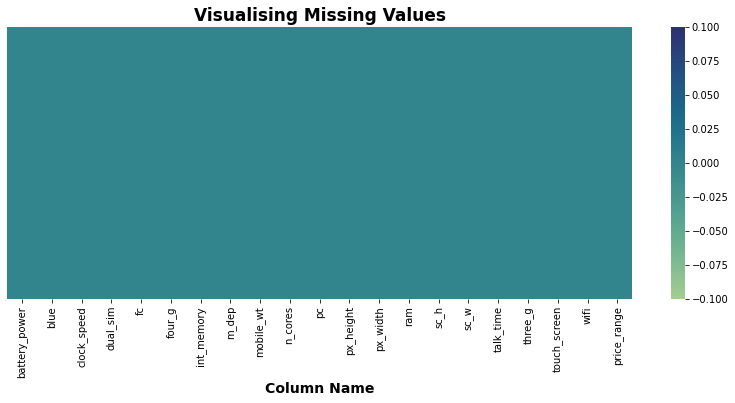

In [110]:
#CHECKING FOR MISSING VALUES
plt.figure(figsize=(14, 5))
sns.heatmap(mobile_data.isnull(), cmap='crest', yticklabels=False)
plt.xlabel("Column Name", size=14, weight="bold")
plt.title("Visualising Missing Values",fontweight="bold",size=17)
plt.show()

**The target variable labels with according to the values.**

*  **0=Low cost**
*  **1=Medium cost**
*  **2=Higgh cost**
*  **3=Very high cost**

# **EDA( Exploratory Data Analysis)**

In [111]:
#LET'S HAVE A LOOK AT OUR TARGET VARIABLE'S COUNTS.
price_range_counts=mobile_data['price_range'].value_counts()
price_range_counts

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

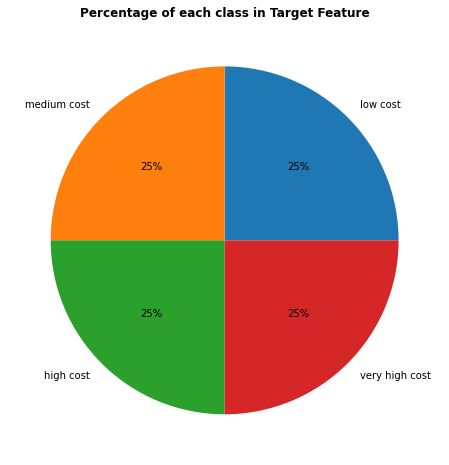

In [112]:
#VISUALISATION OF THE PERCENTAGE OF EACH CLASS IN THE TARGET FEATURE IN PIE CHART
labels = ["low cost", "medium cost", "high cost", "very high cost"]
fig,ax=plt.subplots(figsize=(15,8))
plt.pie(price_range_counts, labels=labels, autopct='%.0f%%')
plt.title('Percentage of each class in Target Feature', fontweight ='bold', size = 12)
plt.show()



*   **Each class has an almost equal number of observations for each category. So our target feature is well balanced. The accuracy score will be the best evaluation metric for us to select the model.**


*   **We can see that our target varibale is equally distributed.**


* **There is no need for oversampling or undersampling beacause our data is balanced.**



### **Price Range V/S Internal Memory**

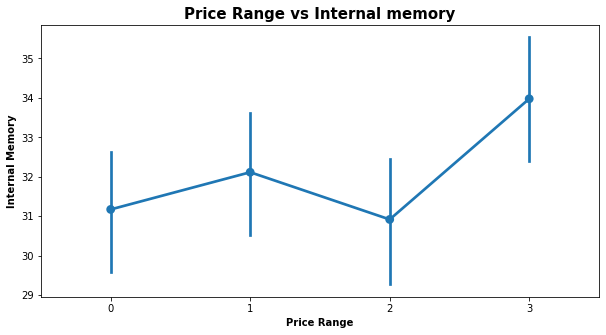

In [113]:
#VISUALIZING PRICE RANGE V/S INTERNAL MEMORY IN POINT PLOT 
plt.figure(figsize=(10,5))
sns.pointplot(x="price_range",y="int_memory", data=mobile_data)
plt.xlabel('Price Range', fontweight ='bold')
plt.ylabel('Internal Memory', fontweight ='bold')
# GIVING A TITLE TO THE PLOT
plt.title('Price Range vs Internal memory', fontweight ='bold', size = 15)
plt.grid(False)
plt.show()

### **Percentage of phones which supports 3G**

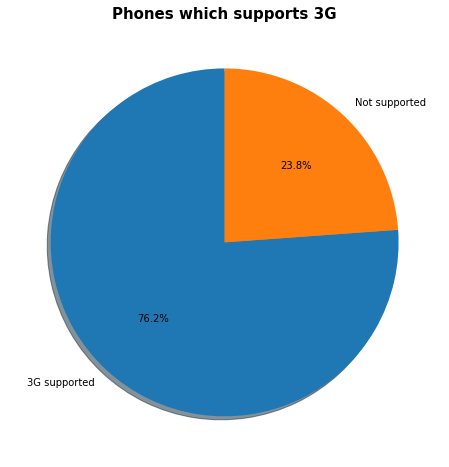

In [114]:
#VISUALIZING THE PERCENTAGE OF PHONES THAT SUPPORT 3G IN PIE CHART
labels = ["3G supported",'Not supported']
values=mobile_data['three_g'].value_counts().values
fig1, ax1 = plt.subplots(figsize=(15,8))
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
# GIVING A TITLE TO THE PLOT
plt.title('Phones which supports 3G', fontweight ='bold' , size = 15)
plt.show()

*  **According to the above graph, 76.2% of phones support 3G, while the remaining 23.8% do not. So 75% of our data has 3G support.**

### **Percentage of phones which supports 4G**

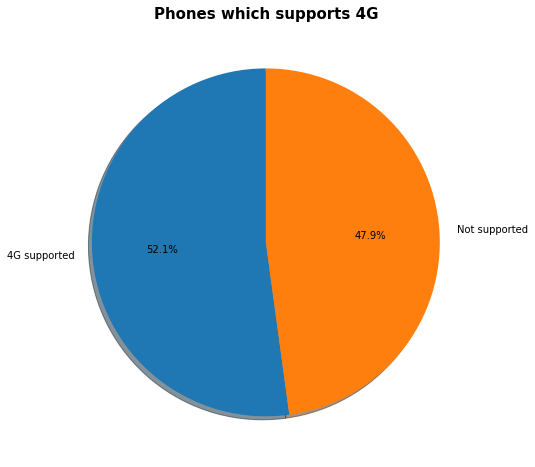

In [115]:
#VISUALIZING THE PERCENTAGE OF PHONES THAT SUPPORT 4G IN PIE CHART
labels = ["4G supported",'Not supported']
values=mobile_data['four_g'].value_counts().values
fig1, ax1 = plt.subplots(figsize=(15,8))
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
# GIVING A TITLE TO THE PLOT
plt.title('Phones which supports 4G', fontweight ='bold' , size = 15)
plt.show()

*  **According to the above graph, 52.1% of phones support 4G, while the remaining 47.9% do not.**

### **Relationship between Price Range & 3G/4G**

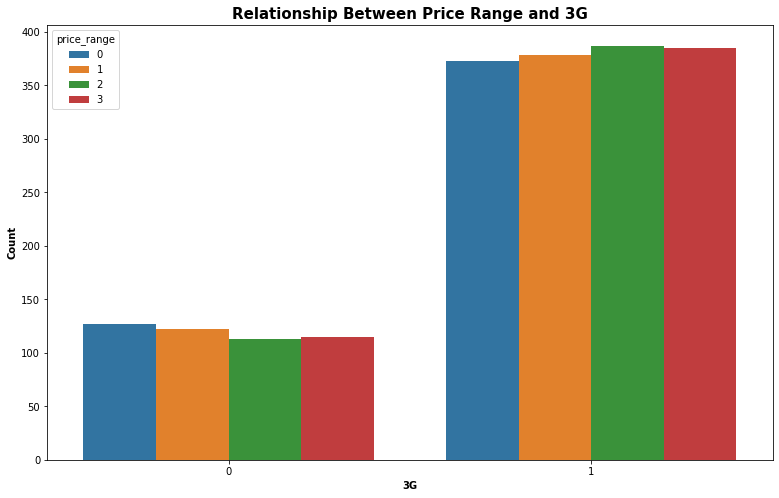

In [116]:
#GRAPHING THE RELATIONSHIP BETWEEN THE PRIME RANGE AND THE 3G IN COUNT PLOT
plt.figure(figsize = (13,8))
sns.countplot(mobile_data['three_g'] , hue = mobile_data['price_range'])
plt.xlabel('3G', fontweight ='bold')
plt.ylabel('Count', fontweight ='bold')
plt.title('Relationship Between Price Range and 3G', fontweight ='bold' , size = 15)
plt.grid(False)
plt.show()

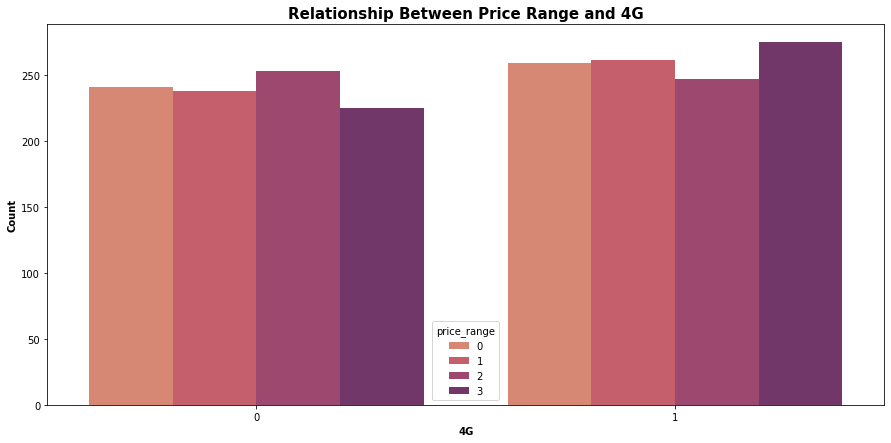

In [117]:

#GRAPHING THE RELATIONSHIP BETWEEN THE PRIME RANGE AND THE 4G IN COUNT PLOT
plt.figure(figsize = (15,7))
sns.countplot(mobile_data['four_g'] , hue = mobile_data['price_range'] , palette = 'flare')
plt.xlabel('4G', fontweight ='bold')
plt.ylabel('Count', fontweight ='bold')
plt.title('Relationship Between Price Range and 4G', fontweight ='bold' , size = 15)
plt.grid(False)
plt.show()

### **Price Range VS Battery power**

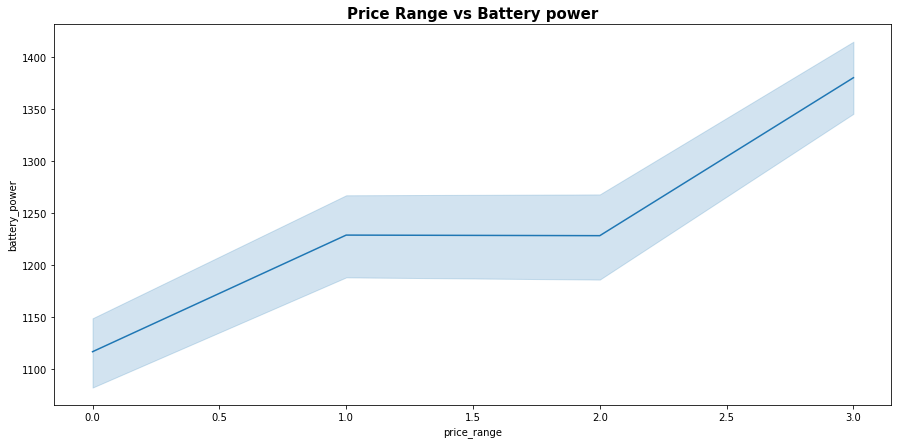

In [118]:
#VISUALIZING PRICE RANGE V/S BATTERY POWER IN LINEPLOT
plt.figure(figsize = (15,7))
sns.lineplot(x="price_range",y="battery_power", data=mobile_data)
plt.title('Price Range vs Battery power',fontweight ='bold' , size = 15)
plt.grid(False)
plt.show()

* **Mobiles with battery power greater than 1300 mAh have a very high cost, and mobiles with battery power between 1200 and 1300 mAh fall into the medium and high cost categories.**

### **Number of Phones vs Camera megapixels of front and primary camera**

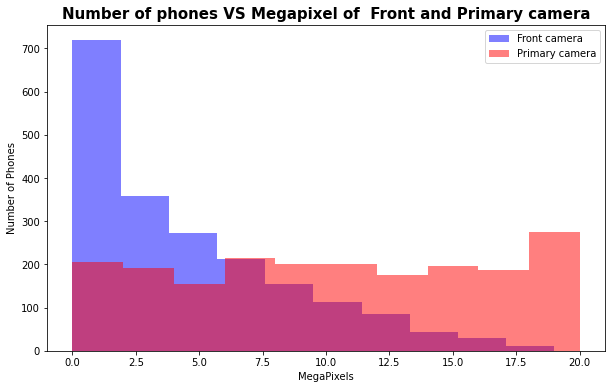

In [119]:
plt.figure(figsize=(10,6))
mobile_data['fc'].hist(alpha=0.5,color='blue',label='Front camera')
mobile_data['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.xlabel('MegaPixels')
plt.ylabel('Number of Phones')
plt.title('Number of phones VS Megapixel of  Front and Primary camera', fontweight ='bold' , size = 15)
plt.grid(False)
plt.legend()
plt.show()

*  **Based on our findings, most phones have low megapixels in the front camera.**

### **Mobile Weight vs Price range**

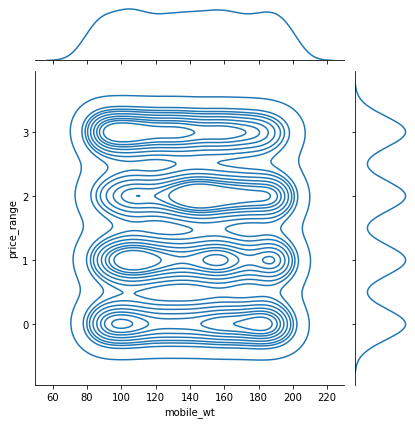

In [120]:
#VISUALIZING PRICE RANGE V/S MOBILE WEIGHT  IN JOINT PLOT
sns.jointplot(x='mobile_wt',y='price_range',data=mobile_data,kind='kde')
plt.show()

### **Bluetooth VS Mobile Phones**

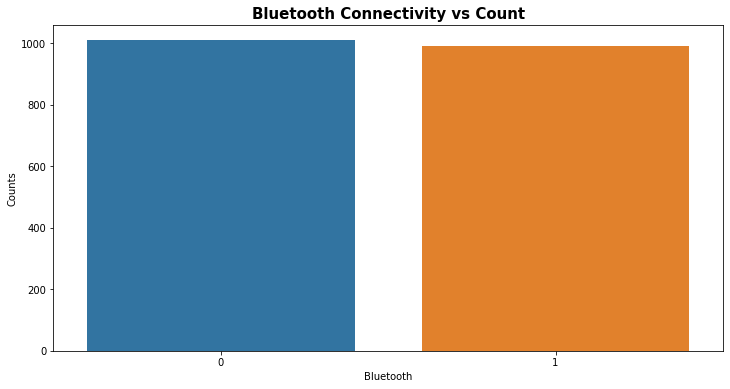

In [121]:
fig,ax=plt.subplots(figsize=(12,6))
x=mobile_data['blue']
y=mobile_data['blue'].value_counts()
sns.barplot(x,y,ax=ax)
plt.xlabel("Bluetooth")
plt.ylabel("Counts")
plt.grid(False)
plt.title("Bluetooth Connectivity vs Count", fontweight ='bold' , size = 15)
plt.show()

*  **As we can see, roughly half of the devices have Bluetooth connectivity, while the other half do not**.

### **Talk time vs Price range**

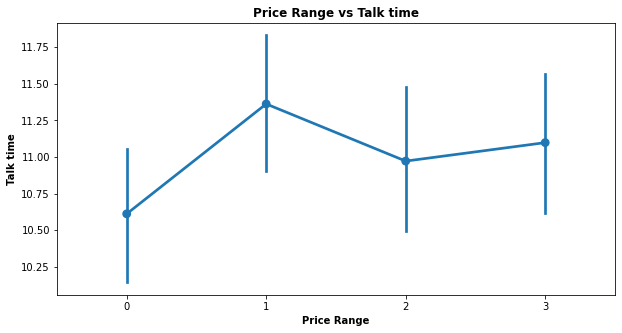

In [122]:
#VISUALIZING PRICE RANGE V/S TALK TIME IN POINT PLOT
plt.figure(figsize=(10,5))
sns.pointplot(x="price_range",y="talk_time", data=mobile_data)
plt.xlabel('Price Range', fontweight ='bold')
plt.ylabel('Talk time', fontweight ='bold')
plt.grid(False)
plt.title('Price Range vs Talk time', fontweight ='bold')
plt.show()

In [123]:
#LET'S SEE THE NUMERICAL COLUMNS OF OUR DATA SET.
numeric_features = list(mobile_data.describe().columns)
numeric_features

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

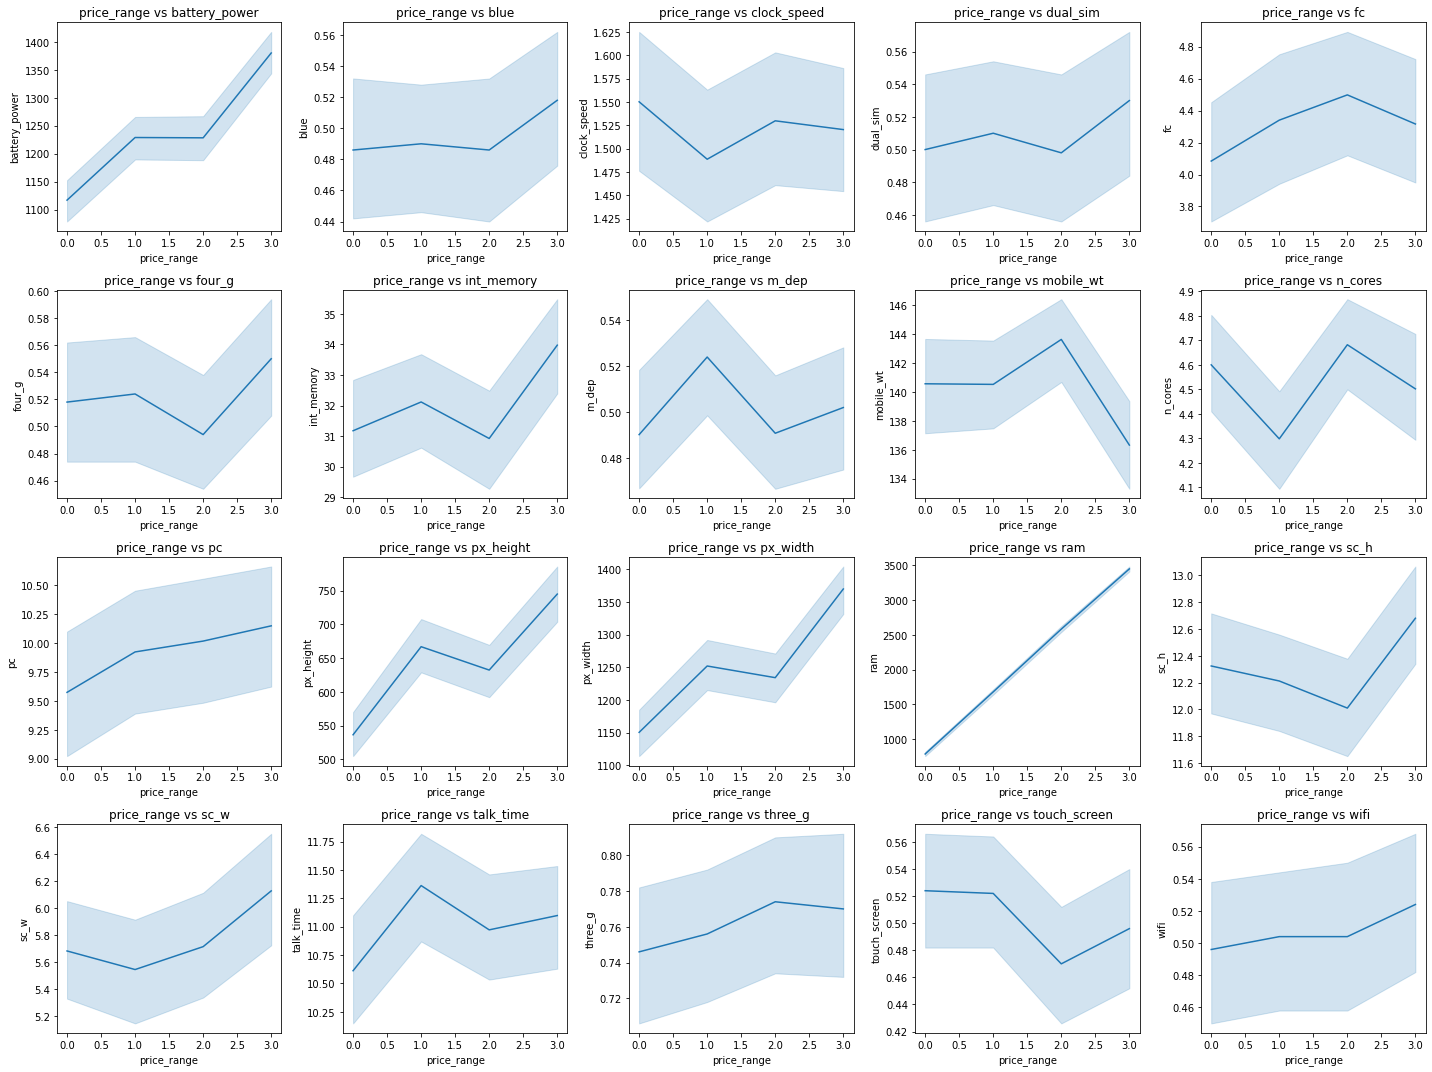

In [124]:
#CHECKING HOW FEATURES AFFECT THE PRICE RANGE
rows=4   
cols=5
counter=1
fig = plt.figure(figsize=(20, 15)) 
for col in numeric_features:
  if col not in ['price_range']:
    #VISUALIZING THE NUMIERICAL FEATURE WITH PRICE RANGE IN LINEPLOT
    plt.subplot(rows,cols,counter)   
    sns.lineplot(x=mobile_data['price_range'], y=mobile_data[col])
    plt.xlabel('price_range')
    plt.ylabel(col)
    plt.grid(False)
    plt.title(f'price_range vs {col}')
    counter=counter+1
    plt.tight_layout()



* **The power range of class 1 and class 2 batteries is nearly identical. As battery power increases, the price also increases, which is quite obvious..**
*   **Mobiles in a very high price range (Class 3) have less weight compared to other classes. That means as the weight of mobiles decreases, their price increases.**


* **Mobile phones with the largest screen height and width are extremely expensive. We can see in the linechart of sc_width and sc_height from class 2 that screen width and height start increasing with price. A similar case is with px_height and px_width. When the resolution of the screen increases, the price also increases.**
*   **RAM has a clear relationship with price range.**





### **Lets check out the distribution of our each features**

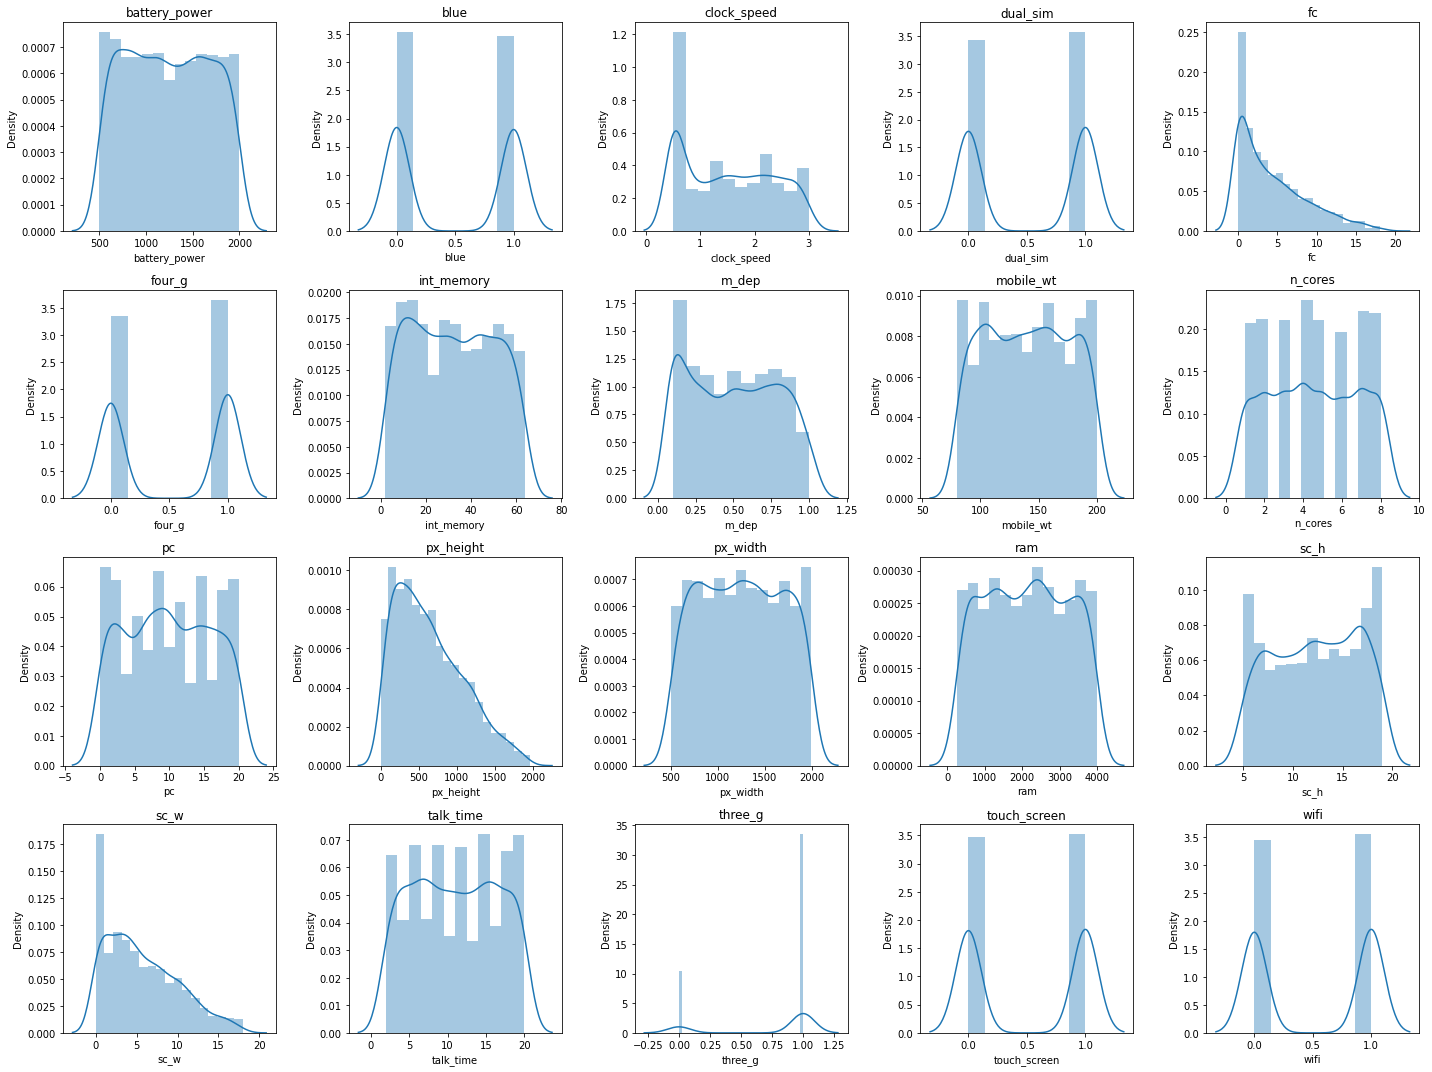

In [125]:
#printing displots to analyze the distribution of all numerical features
# plot a bar plot for each numerical feature count (except store)
rows=4   
cols=5
counter=1
fig = plt.figure(figsize=(20, 15)) 

for col in numeric_features[:-1]:
    plt.subplot(rows,cols,counter)
    feature = mobile_data[col]
    sns.distplot(feature)    
    plt.title(col)
    plt.grid(False)
    counter=counter+1
    plt.tight_layout()
     



*  **Most of our features look similar to normal distribution and some features have multi mode because one of those columns has categories, which hold values like 0 or 1.**




### **Outlier Detection**

In [126]:
#outlier detection
outlier_list = ['clock_speed','fc','pc','sc_h','sc_w','int_memory','battery_power','px_height','px_width','ram']

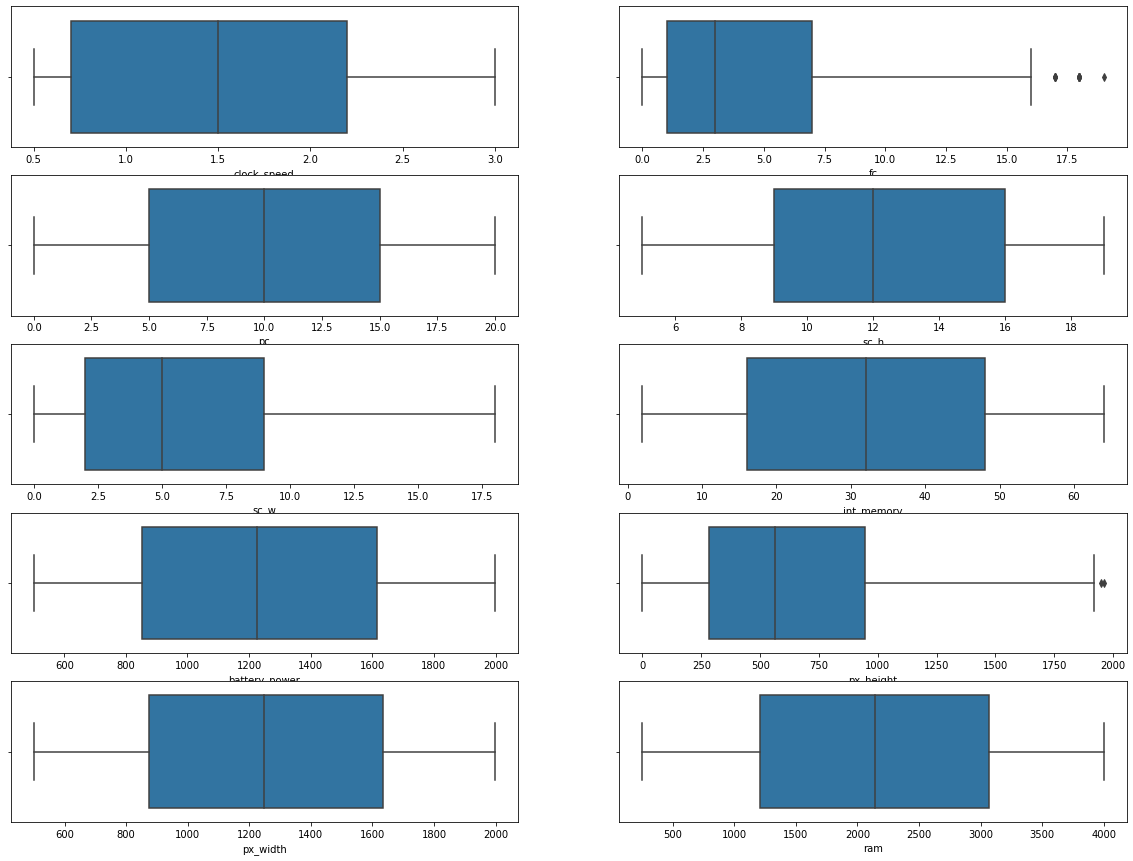

In [127]:
plt.figure(figsize=(20,15))
for i in range(len(outlier_list)):
  plt.subplot(5,2,i+1)
  sns.boxplot(mobile_data[outlier_list[i]])



*   **As we see, there are not too many outliers.So we can move forward**



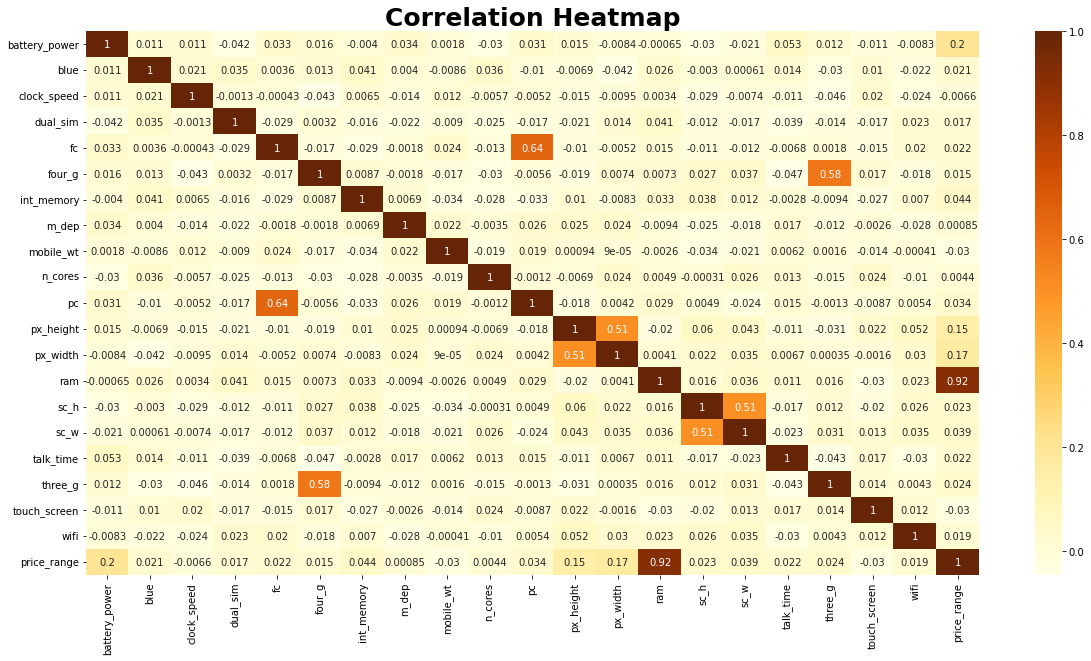

In [128]:
#Plotting the heatmap for Correlation analysis
fig = plt.figure(figsize=(20,10))
correlation = mobile_data.corr()
sns.heatmap(correlation, annot = True, cmap = "YlOrBr")
plt.title('Correlation Heatmap', fontweight ='bold',size = 25)
plt.show()



*  **RAM and price_range show a high correlation, which is a good sign because it signifies that RAM will be a major deciding factor in estimating the price range.**



*  **There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if the front camera of a phone is good, the back camera will also be good.**


*   **If a mobile phone supports 4G, it has to be compatible with 3G as well, because 4G is the latest generation that came after 3G. Thus, a phone with a 4G feature should support 3G as well.**

*   **Battery_power also has a positive correlation with the price range. Generally, mobile phones with high prices come with good battery power.**


*   **sc_h and sc_w are positively correlated.**






# **Modelling**

## **Splitting the dataset**

In [129]:
#independent variables
X = mobile_data.drop('price_range',axis=1)

In [130]:
#dependent variable
y = mobile_data['price_range']

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)

(1340, 20)
(660, 20)


## **1. KNN Classifier**

**K Nearest Neighbor algorithm falls under the Supervised Learning category and is used for classification (most commonly) and regression. It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.**

In [132]:
#Importing  KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

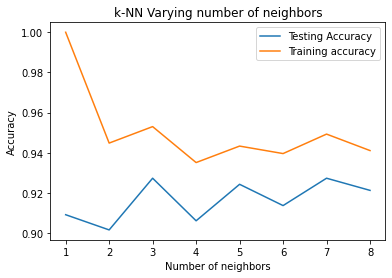

In [133]:
#GENERATE PLOT
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [134]:
#LET'S SETUP A KNN CLASSIFIER WITH K NEIGHBORS
knn = KNeighborsClassifier(n_neighbors=7)

In [135]:
#LET'S FIT  THE MODEL
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [136]:
#CALCULATING THE METRICS ON TEST DATA
knn_test_score = knn.score(X_test,y_test)
knn_test_score


0.9272727272727272

In [137]:
#CALCULATING THE METRICS ON TRAIN DATA
knn_train_score = knn.score(X_train,y_train)
knn_train_score

0.9492537313432836

In [138]:
#LET'S IMPORT CONFUSION_MATRIX
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,roc_curve

In [139]:
#LET'S GET THE PREDICTIONS USING THE CLASSIFIER WE HAD FIT ABOVE.
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [140]:
#CONFUSION MATRIX FOR TEST DATASET.
matrix = confusion_matrix(y_test,y_test_pred)
matrix

array([[160,   5,   0,   0],
       [  6, 153,   6,   0],
       [  0,   8, 149,   8],
       [  0,   0,  15, 150]])

**Heatmap of  confusion matrix on  train dataset**

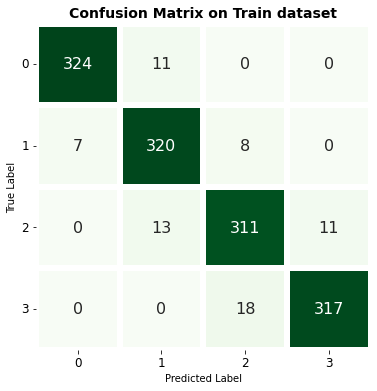

In [141]:
#PLOTTING HEAT MAP OF  CONFUSION MATRIX ON TRAIN DATASET
cm = confusion_matrix(y_train, y_train_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix on Train dataset",fontweight ='bold', size = 14)
plt.show()

**Heatmap of confusion matrix on test dataset**

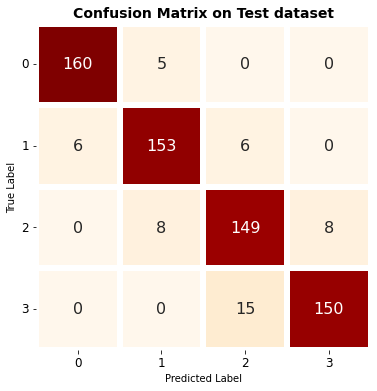

In [142]:
#PLOTTING HEAT MAP OF  CONFUSION MATRIX ON TEST DATASET
cm = confusion_matrix(y_test, y_test_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix on Test dataset",fontweight ='bold', size = 14)
plt.show()

In [143]:
#LET'S DO THE PREDICTION
y_pred_proba = knn.predict_proba(X_test)

In [144]:
# ROC ACCURACY SCORE
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

0.9931741659014386

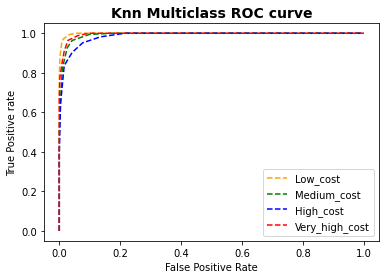

In [145]:
# ROC CURVE FOR CLASSES
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    
# PLOTTING MULTICLASS ROC CURVE   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title('Knn Multiclass ROC curve', fontweight ='bold', size = 14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [146]:
#CLASSIFICATION REPORT FOR TRAIN DATA
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       335
           1       0.93      0.96      0.94       335
           2       0.92      0.93      0.93       335
           3       0.97      0.95      0.96       335

    accuracy                           0.95      1340
   macro avg       0.95      0.95      0.95      1340
weighted avg       0.95      0.95      0.95      1340



In [147]:
#CLASSIFICATION REPORT FOR TEST DATA
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       165
           1       0.92      0.93      0.92       165
           2       0.88      0.90      0.89       165
           3       0.95      0.91      0.93       165

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



In [148]:
#TEST KNN
from sklearn.metrics import r2_score
print("Model Score:",knn.score(X_test,y_test))

MSE= mean_squared_error(y_test,y_test_pred)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_test,y_test_pred)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test,y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9272727272727272
MSE : 0.07272727272727272
RMSE : 0.26967994498529685
R2 : 0.9418181818181818
Adjusted R2 : 0.939997154645042


## **2.Logistic Regression**

**Logistic regression is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e. binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables. The independent variables can be nominal, ordinal, or of interval type.**

In [149]:
#IMPORTING THE LIBRAIRY
from sklearn.linear_model import LogisticRegression

In [150]:
#FITTING THE MODEL
logistic_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [151]:
#GET THE PREDICTED PROBABILITIES
train_preds_proba = logistic_model.predict_proba(X_train)
test_preds_proba = logistic_model.predict_proba(X_test)

In [152]:
# GET THE PREDICTED CLASSES
train_class_pred = logistic_model.predict(X_train)
test_class_pred = logistic_model.predict(X_test)
     

In [153]:

# LET'S SEE  THE ACCURACY SCORES
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)
     

The accuracy on train data is  0.8052238805970149
The accuracy on test data is  0.7424242424242424


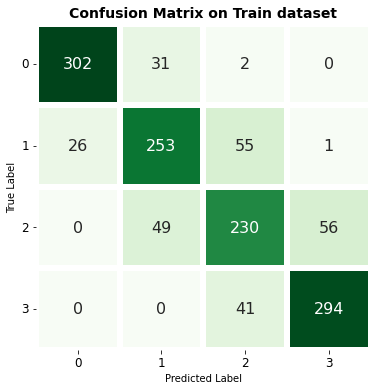

In [154]:
#PLOTTING HEAT MAP OF  CONFUSION MATRIX ON TRAIN DATASET
labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_train, train_class_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix on Train dataset",fontweight ='bold', size = 14)
plt.show()

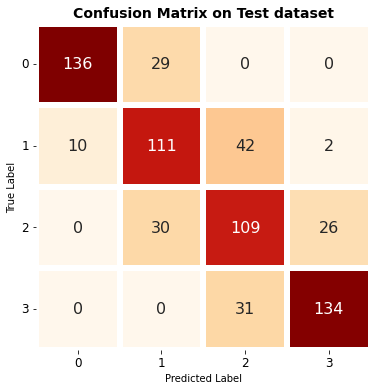

In [155]:
#PLOTTING HEAT MAP OF  CONFUSION MATRIX ON TEST DATASET
cm = confusion_matrix(y_test, test_class_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix on Test dataset",fontweight ='bold', size = 14)
plt.show()
     

In [156]:
#PREDICTING 
y_pred_proba = logistic_model.predict_proba(X_test)

In [157]:
#LET'S SEE THE ACCURACY SCORE 
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

0.9308417508417509

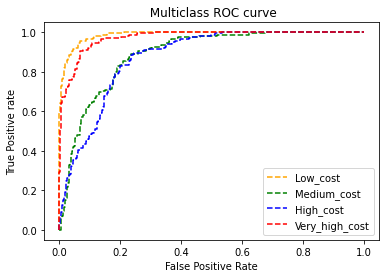

In [158]:
#ROC CURVE FOR CLASSES
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds_proba[:,i], pos_label=i)
    
#PLOTTING MULTICLASS ROC CURVE
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title(' Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);
     


In [159]:
#CLASSIFICATION REPORT FOR TRAIN DATA
print(classification_report(y_train,train_class_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       335
           1       0.76      0.76      0.76       335
           2       0.70      0.69      0.69       335
           3       0.84      0.88      0.86       335

    accuracy                           0.81      1340
   macro avg       0.80      0.81      0.80      1340
weighted avg       0.80      0.81      0.80      1340



In [160]:
#CLASSIFICATION REPORT FOR TEST DATA
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       165
           1       0.65      0.67      0.66       165
           2       0.60      0.66      0.63       165
           3       0.83      0.81      0.82       165

    accuracy                           0.74       660
   macro avg       0.75      0.74      0.75       660
weighted avg       0.75      0.74      0.75       660



## **3.Decision Tree Classifier**

**Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.**

In [161]:
#FITTING THE MODEL
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [162]:
reg_decision_model=DecisionTreeClassifier()
parameters={"splitter":["best","random"],
            "max_depth" : [7,8,9,10],
          #  "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
          #  "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=best;, score=-1.128 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=best;, score=-0.365 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=best;, score=-0.439 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=random;, score=-0.895 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=random;, score=-0.617 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=random;, score=-0.605 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, splitter=best;, score=-2.114 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, splitter=best;, score=-0.987 total time=   0.0s
[CV 3/3] END max_depth=

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [163]:
dtree_optimal_model = tuning_model.best_estimator_
dtree_optimal_model

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=30)

In [164]:
# MAKING PREDICTIONS ON TRAIN AND TEST DATA

train_class_preds = dtree_optimal_model.predict(X_train)
test_class_preds = dtree_optimal_model.predict(X_test)

In [165]:
#LET'S SEE THE ACCURACY SCORES
train_class_preds
test_class_preds
print("Accuracy score (training): {0:.3f}".format(dtree_optimal_model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(dtree_optimal_model.score(X_test, y_test)))
     

Accuracy score (training): 0.913
Accuracy score (validation): 0.841


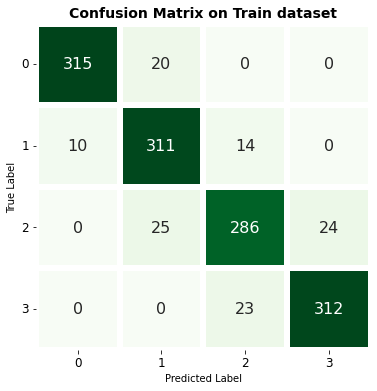

In [166]:
#PLOTTING HEAT MAP OF  CONFUSION MATRIX ON TRAIN DATASET
labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_train, train_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix on Train dataset",fontweight ='bold', size = 14)
plt.show()

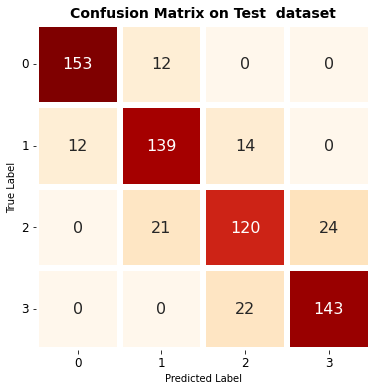

In [167]:
#PLOTTING HEAT MAP OF  CONFUSION MATRIX ON TEST DATASET
labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_test,test_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix on Test  dataset",fontweight ='bold', size = 14)
plt.show()

In [168]:
#CLASSIFICATION REPORT FOR TRAIN DATA
print(classification_report(y_train,train_class_preds))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       335
           1       0.87      0.93      0.90       335
           2       0.89      0.85      0.87       335
           3       0.93      0.93      0.93       335

    accuracy                           0.91      1340
   macro avg       0.91      0.91      0.91      1340
weighted avg       0.91      0.91      0.91      1340



In [169]:
#CLASSIFICATION REPORT FOR TEST DATA
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       165
           1       0.81      0.84      0.82       165
           2       0.77      0.73      0.75       165
           3       0.86      0.87      0.86       165

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



## **4.Support Vector Machine(SVC)**

**Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.**

**The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.**

In [170]:
#FITTING THE MODEL
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [171]:
# PREDICTIONS ON THE TRAIN AND TEST DATA
y_test_svc=svc.predict(X_test)
y_train_svc=svc.predict(X_train)

In [172]:
# CONFUSSION MATRIX FOR TRAIN AND TEST DATA
cm_train_svc=confusion_matrix(y_train,y_train_svc)
cm_test_svc=confusion_matrix(y_test,y_test_svc)

print( 'Confusion matrix for training set\n',cm_train_svc)
print( 'Confusion matrix for testing set \n',cm_test_svc)

Confusion matrix for training set
 [[327   8   0   0]
 [ 13 316   6   0]
 [  0  18 300  17]
 [  0   0   9 326]]
Confusion matrix for testing set 
 [[163   2   0   0]
 [  5 159   1   0]
 [  0   8 148   9]
 [  0   0   7 158]]


In [173]:
#LET'S SEE THE ACCURACY SCORES
train_accu3=accuracy_score(y_train,y_train_svc)
test_accu3=accuracy_score(y_test,y_test_svc)
print('Train Set Accuracy:',train_accu3)
print('Test Set Accuracy:',test_accu3)

Train Set Accuracy: 0.9470149253731344
Test Set Accuracy: 0.9515151515151515


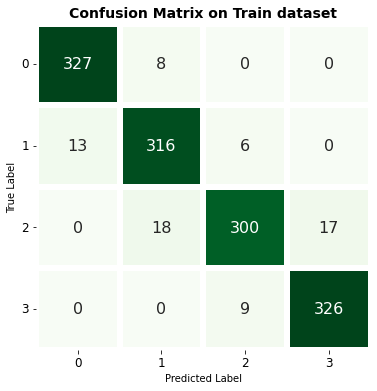

In [174]:
#PLOTTING HEAT MAP OF  CONFUSION MATRIX ON TRAIN DATASET
labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_train,y_train_svc)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix on Train dataset",fontweight ='bold', size = 14)
plt.show()

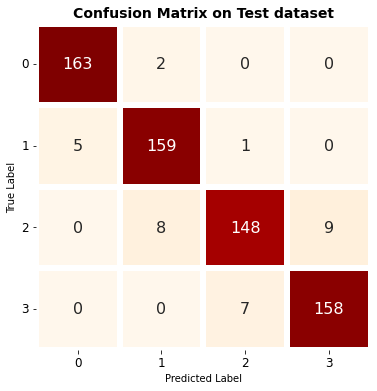

In [175]:
#PLOTTING HEAT MAP OF  CONFUSION MATRIX ON TEST DATASET
labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_test,y_test_svc)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix on Test dataset",fontweight ='bold', size = 14)
plt.show()

## **Which Model is most accurate?**

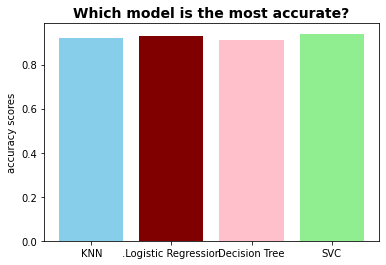

In [176]:
models = ['KNN', '.Logistic Regression', 'Decision Tree','SVC']
acc_scores = [0.92, 0.93, 0.91,0.94]

plt.bar(models, acc_scores, color=['skyblue', 'maroon', 'pink', 'lightgreen'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?",fontweight ='bold', size = 14)
plt.show()

## **Conclusion**

**We encoded the file in Colab Notebook by mounting the drive after downloading the data as a CSV file from the Almabetter Capstone project dashboard.**

**The data was cleared, and there are not any NaN or Null values; there are also no duplicate values. Each and every column was compared to gain knowledge for analysis and gain some insights while doing some EDA. The first challenge was locating the outlier in the dataset, so we checked each column and discovered that there were not too many outliers in the dataset. We plotted graphs for each variable using information from the dataframe to fully understand and visualise them. We determined the price range using graphs; battery power, bluetooth connectivity, RAM, FC (front camera megapixels), PC (primary camera megapixels), mobile weight, and screen size were confirmed using the data presented.**



*   **We started with data understanding, data wrangling, and basic EDA, where we found the relationships, trends between price range and other independent variables.**
*  **Mobiles with battery power greater than 1300 mAh have a very high cost, and mobiles with battery power between 1200 and 1300 mAh fall into the medium and high cost categories.**
* **The 75% of the devices has feature called three_g.**
*  **In the analysis of the categorical features like blue (bluetooth), dual sim, touch screen, and 4G, we saw that 50% of the devices have these features and 50% don't.**
*   **We can tell from the analysis that when ram is high, the price will be higher. As the higher the ram, the higher the price.**
*  **Our target variable is well balanced. There is no class imbalance seen.**
*   **RAM, battery power, pixels played more significant role in deciding the price range of mobile phone**
*  **The "price range" of the given dataset has an equal distribution of the total number of phones in each of the price ranges with 500 numbers.**
*  **During multivariate analysis, in the correlation heatmap, we get to see that "ram" is highly correlated with "price range," thus inferring that "ram" has a high impact on price prediction.**
*  **KNN, logistic regression, decision tree, and support vector machine were implemented, and all modules are performing well on the data.**

* **As a result, we can tell that support vector machine is performing well on data compared to other models with 0.94 accuracy.**


